# **MODEL BUILDING**

## **3.Reinforcement Learning Model for Earthquake**

# *Mount Google drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Import Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# *Read data from csv file*

In [ ]:
path= "/content/drive/MyDrive/IBM/datas.csv"

In [ ]:
df=pd.read_csv( path)

# *Plot Earthquake Prone Locations*

Text(0.5, 1.0, 'Earthquake Prone Locations ')

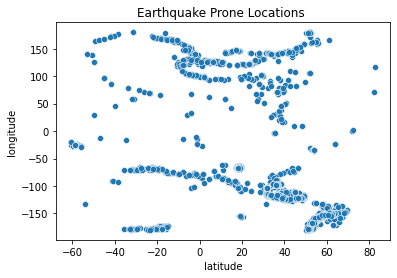

In [ ]:
sns.scatterplot(x='latitude',y='longitude',data=df)
plt.title('Earthquake Prone Locations ')

# *Import Dependencies* 

In [ ]:
import gym 
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 
import numpy as np
import random
import os


In [ ]:
pip install stable_baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 4.2 MB/s 
     |████████████████████████████████| 1.5 MB 20.8 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=d03e0ae3c3100e0289db46157f608e7a39fe02b1178d6706394cbf5429eb1b03
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

# *Building an environment*

In [ ]:
class EarthquakeEnv(Env):
    def __init__(self):
        # Actions we can take: hide, stay, vacate
        self.action_space = Discrete(3)
        # Plate movement array
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        # Set start magnitude
        self.state = 5 + random.randint(-3,3)
        # Set decision duration
        self.decision_duration = 60
        
    def step(self, action):
        # Apply action
        # 0 -1 = -1 magnitude
        # 1 -1 = 0 
        # 2 -1 = 1 magnitude 
        self.state += action -1 
        # Reduce decision duration by 1 second
        self.decision_duration -= 1 
        
        # Calculate reward
        if self.state >=5 and self.state <=20: 
            reward =1 
        else: 
            reward = -1 
        
        # Check if time is over
        if self.decision_duration <= 0: 
            done = True
        else:
            done = False
        
        # Apply magnitude error
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info

    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        # Reset magnitude
        self.state = np.array([15 + random.randint(-3,3)]).astype(float)
        # Reset decision duration
        self.decision_duration = 60 
        return self.state

In [ ]:
env = EarthquakeEnv()

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  -self.np_random.exponential(size=upp_bounded[upp_bounded].shape)


In [ ]:
env.observation_space.sample()

array([16.628809], dtype=float32)

# *Test Environment*

In [ ]:
episodes = 80
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:-42
Episode:2 Score:60
Episode:3 Score:50
Episode:4 Score:60
Episode:5 Score:60
Episode:6 Score:40
Episode:7 Score:56
Episode:8 Score:10
Episode:9 Score:60
Episode:10 Score:6
Episode:11 Score:60
Episode:12 Score:60
Episode:13 Score:60
Episode:14 Score:-10
Episode:15 Score:60
Episode:16 Score:60
Episode:17 Score:22
Episode:18 Score:60
Episode:19 Score:60
Episode:20 Score:-30
Episode:21 Score:60
Episode:22 Score:56
Episode:23 Score:34
Episode:24 Score:60
Episode:25 Score:-2
Episode:26 Score:60
Episode:27 Score:60
Episode:28 Score:-4
Episode:29 Score:-6
Episode:30 Score:60
Episode:31 Score:56
Episode:32 Score:36
Episode:33 Score:60
Episode:34 Score:60
Episode:35 Score:60
Episode:36 Score:60
Episode:37 Score:60
Episode:38 Score:60
Episode:39 Score:48
Episode:40 Score:60
Episode:41 Score:60
Episode:42 Score:-28
Episode:43 Score:60
Episode:44 Score:16
Episode:45 Score:60
Episode:46 Score:58
Episode:47 Score:52
Episode:48 Score:50
Episode:49 Score:6
Episode:50 Score:-4
Episode

# *Train Model*

In [ ]:
log_path = os.path.join('Training', 'Logs')

In [ ]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  def reset(self, **kwargs):


In [ ]:
model.learn(total_timesteps=50000)

Logging to Training/Logs/PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 60       |
|    ep_rew_mean     | 59.7     |
| time/              |          |
|    fps             | 1202     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 60          |
|    ep_rew_mean          | 59.6        |
| time/                   |             |
|    fps                  | 870         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008101784 |
|    clip_fraction        | 0.0426      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.11        |

# *Save Model*

In [ ]:
model.save('PPO')

In [ ]:
evaluate_policy(model, env, n_eval_episodes=80)

(60.0, 0.0)